In [368]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [369]:
# Importing the dataset

data = pd.read_csv("./data.csv", index_col="car_ID")
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Exploratory Data Analysis 

In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [371]:
# symboling is a categorical variable
# Converting symboling to Object dtype

data["symboling"] = data["symboling"].astype('object')
data.symboling.dtype

dtype('O')

In [372]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [373]:
# Missing values

data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [374]:
for col in data.columns:
    print("{}: {}".format(col, len(data[col].unique())))

symboling: 6
CarName: 147
fueltype: 2
aspiration: 2
doornumber: 2
carbody: 5
drivewheel: 3
enginelocation: 2
wheelbase: 53
carlength: 75
carwidth: 44
carheight: 49
curbweight: 171
enginetype: 7
cylindernumber: 7
enginesize: 44
fuelsystem: 8
boreratio: 38
stroke: 37
compressionratio: 32
horsepower: 59
peakrpm: 23
citympg: 29
highwaympg: 30
price: 189


<AxesSubplot:>

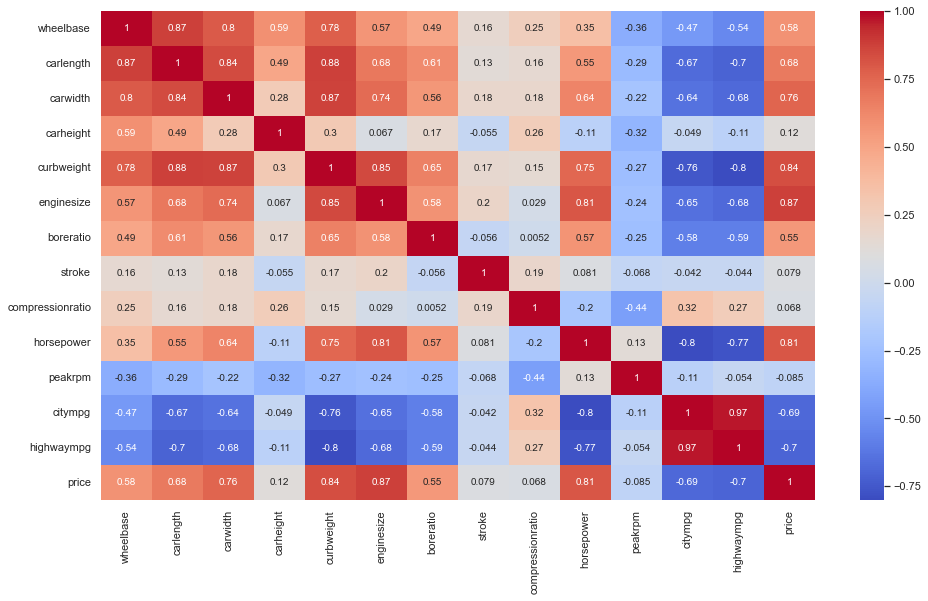

In [375]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)

<AxesSubplot:>

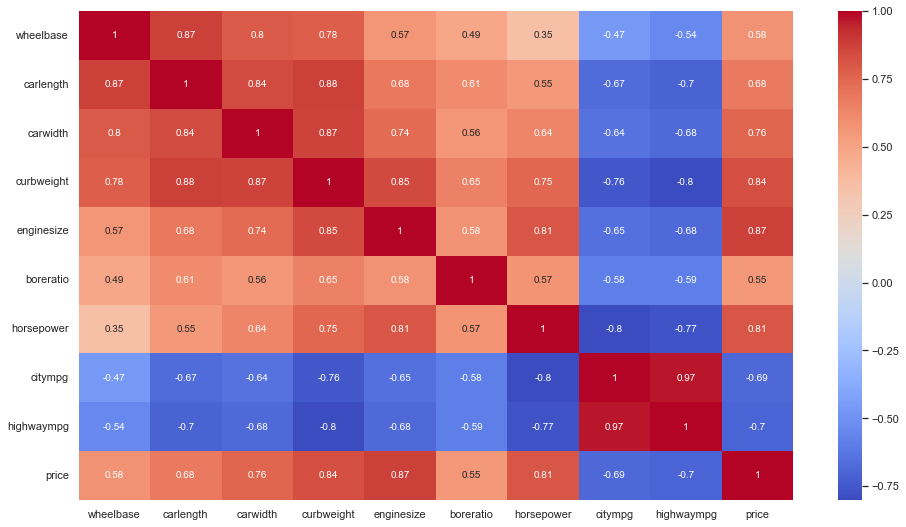

In [376]:
corr = data.corr()
high_corr_features = corr["price"][abs(corr["price"]) >= 0.3].keys()

plt.figure(figsize=(16,9))
sns.heatmap(data[high_corr_features].corr(), cmap="coolwarm", annot=True)

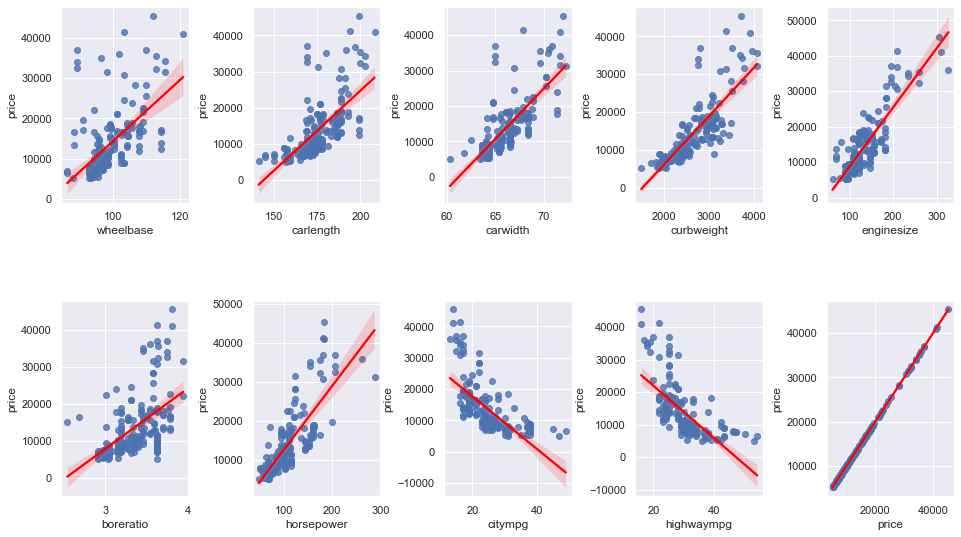

In [394]:
# Visualizing corelation between price and highly correlated variables 

plt.figure(figsize=(16,9))

for i,col in enumerate(high_corr_features):
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.regplot(x=data[col], y=data["price"], line_kws={"color":"red"} )

Skewness: 1.7776781560914454


<Figure size 1152x648 with 0 Axes>

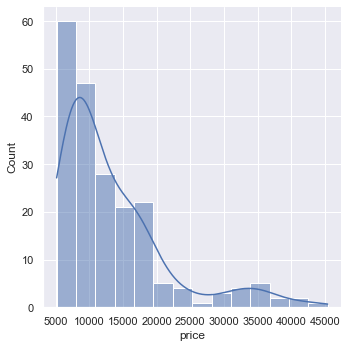

In [378]:
# Skewness of the price

plt.figure(figsize=(16,9))
sns.set_theme()
sns.displot(data["price"], kde=True)

print("Skewness: {}".format(data["price"].skew()))

### Train Test Split 

In [379]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["price"], axis=1)
y = data["price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=5)

X_train.shape, y_train.shape, X_test.shape,y_test.shape

((143, 24), (143,), (62, 24), (62,))

### Model

In [380]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [381]:
# Numerical variables

numerical_features = X.select_dtypes(include=["float64","int64"]).keys()
numerical_features

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [382]:
# Categorical variables

categorical_features = X.select_dtypes(include="object").keys()
categorical_features

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [383]:
# Creating dummies for categorical data and 
# Scaling data for numerical data 
# Both can be done simultaneously using ColumnTransformer

preprocessor = ColumnTransformer(transformers = [
                    ('num', StandardScaler(), numerical_features),
                    ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_features)])

In [384]:
# Creating pipeline

pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                             ('reg', Ridge(alpha=10))])

In [385]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object'))])),
                ('reg', Ridge(alpha=10))])

In [386]:
pipeline.score(X_train,y_train)

0.9151864730492903

In [387]:
pipeline.score(X_test,y_test)

0.88402770526343

### Predicting New Data

In [388]:
import pickle

pickle.dump(pipeline,open("CarPricePredictionModel.pkl","wb"))

In [392]:
input_data = [[3,'alfa-romero giulia','gas','std','two','convertible','rwd','front',82.6,
         200.8,64.1,48.8,2248,'dohc','four',120,'mpfi',3.57,2.68,12.0,111,4000,25,29]]

In [393]:
pipe.predict(pd.DataFrame(input_data, columns = X.columns.to_list()))

array([13362.0888348])